Привет, меня зовут Гребенюк Артём. Сегодня я буду делать ревью твоего проекта!\
В Практикуме принято общаться на "ты", однако если это неудобно - дай знать, и можем перейти на более официальное общение.

Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку: 

<div class="alert alert-block alert-success">
<b>Success:</b> Если все сделано хорошо. </div>

<div class="alert alert-block alert-warning">
<b>Remarks:</b> Некритичное замечание; если таких замечаний меньше трех — проект может быть принят без их отработки.</div>

<div class="alert alert-block alert-danger">
<b>Needs fixing:</b> Грубая ошибка, необходимо исправить, иначе проект не будет принят.
</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
Например так:
<div class="alert alert-block alert-info">
<b>Fixed:</b> 
Hello World! ✔
</div>

Или можешь использовать эту галочку ✔ в моих комментариях, если писать особо нечего.

<div class="alert alert-block alert-warning">
<b>Общее впечатление:</b> 
    
- Спасибо за работу :)
- У меня есть пара ремарок, которые помогут тебе сделать проект еще лучше.
- Пробегись по моим комментариям, исправь недочёты и всё будет отлично :)
    
</div>



<div class="alert alert-block alert-info">
Привет, Артём!
Спасибо за ремарки, сейчас все исправим :)
</div>

<div class="alert alert-block alert-success">
<b>Привет!</b> Отличная работа над ремарками! Проект принят, поздравляю, желаю удачи в дальнейшем обучении :)

In [392]:
#%pip install -q -r requirements.txt

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.


# Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

В ходе исследования будут рассмотрены следующие вопросы:

- Есть ли зависимость между наличием детей и возвратом кредита в срок?
- Есть ли зависимость между семейным положением и возвратом кредита в срок?
- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
- Как разные цели кредита влияют на его возврат в срок?

Перед непосредственной работой над поставленными вопросами будет проведена предобработка данных, чтобы очистить их от возможных артефактов и привести в подходящий для проведения исследования формат.

### Оглавление

1. [Открытие данных](#start)
2. [Предобработка данных](#preprocessing)
    * [Очистка данных](#clear)
    * [Обработка пропущенных значений](#null)
    * [Замена типа данных](#type)
    * [Обработка дубликатов](#duplicates)
    * [Лемматизация](#lemma)
    * [Категоризация данных](#categorize)
3. [Ответы на вопросы](#answers)
4. [Общий вывод](#conclusion)


<div class="alert alert-block alert-warning">
<b>Remarks:</b> 

Отлично, что у проекта есть введение. Однако стоит задуматься, как еще его можно дополнить, чтобы сделать более ценным для читателя. В студенческом ноушене (если нет доступа, спроси куратора) есть статья о том, как мы оформляем работы.
    
Также советую тебе взглянуть на <a href="https://www.kaggle.com/notebooks/">работы</a> профессиональных аналитиков, чтобы оценить, как другие люди оформляют и проводят исследования. </div>


<div class="alert alert-block alert-info">
Спасибо за ремарку, мне так тяжело поначалу давался проект, что к концу я совершенно забыла (или забила?) на его оформление.

<b>Fixed:</b> посмотри, я добавила краткое содержание проекта и оглавление с гиперссылками. ✔
</div>

<div class="alert alert-block alert-success">
теперь отличное введение получилось!

## Шаг 1. Откройте файл с данными и изучите общую информацию <a id="start"></a>

In [431]:
import pandas as pd # импорт библиотеки Pandas
from pymystem3 import Mystem # импорт библиотеки pymystem3
from collections import Counter # импорт библиотеки collections
import seaborn as sns
m = Mystem()

In [394]:
data = pd.read_csv('/datasets/data.csv') # чтение файла и запись в переменную data
data.info() # вывод общей информации о таблице методом info
data.describe() # вывод 5 первых и последних строк таблицы 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


In [395]:
data.sample(5, random_state=0)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
7340,2,-3818.249310,39,среднее,1,женат / замужем,0,F,сотрудник,0,40930.315696,покупка жилья
3957,0,-12111.680981,47,среднее,1,женат / замужем,0,F,компаньон,0,108406.132467,покупка коммерческой недвижимости
6605,0,-3617.168602,48,среднее,1,Не женат / не замужем,4,M,сотрудник,1,214785.654014,получение высшего образования
14910,0,NaN,20,среднее,1,Не женат / не замужем,4,M,сотрудник,0,NaN,покупка жилой недвижимости
763,0,NaN,21,среднее,1,гражданский брак,1,M,компаньон,0,NaN,покупка жилья


<div class="alert alert-block alert-warning">
<b>Remarks:</b> 
   
- лучше собирать все импорты, настройки и ключевые константы в начале проекта - так в нем будет гораздо проще ориентироваться ✔
- стоит отделять импорты от открытия датасета. Это делается для того, чтобы иметь возмонжность в любой момент дописать нвоые библиотеки, перезапустить ячейку с импортами и продолжить работу, не перетирая датасет. ✔
- для знакомства с датасетом можно применить методы `head()`, `tail()` и `sample()` - попробуй. Также рекмоендую познакомиться с параметром `random_state` для функции `sample()` ✔
- функция `describe()` может быть очень полезна при знакомстве с датасетом, советую её тут использовать. Советую почитать про её аргументы - пригодится в следующих проектах, а также рекомендую рассматривать её в транспонированном виде - в больших датасетах будет гораздо удобнее - `df.describe().T` ✔

<div class="alert alert-block alert-warning">
<b>Remarks:</b> кажется, эти сортировки не очень показательны, думаю метод `describe()` - то, что тебе нужно :)

<div class="alert alert-block alert-info">
<b>Fixed:</b> суперский метод, спасибо! ✔
</div>

<div class="alert alert-block alert-success">
отличная работа!

**Вывод**

1. Столбцы "days_employed" и "total_income" содержат одинаковое количество пропусков.
2. В столбце "days_employed" и 'total_income' данные записаны в виде чисел с плавающей точкой.
3. В столбце "days_employed" много отрицательных значений, также есть значения слишком большие и слишком маленькие, возможно, запись не в днях.
4. В столбце 'dob_years' есть нули.
5. Дубликаты в "education".
6. В столбце с кол-вом детей есть отрицательные значения и подозрительно большие.

## Шаг 2. Предобработка данных <a id="processing"></a>

### Очистка данных <a id="clear"></a>

*Посчитаем сколько в таблице отрицательных значений в кол-ве детей.*

In [396]:
data[data['children'] < 0]['children'].count()

47

<div class="alert alert-block alert-warning">
<b>Remarks:</b> старайся комментарии к исследованию всегда писать в маркдаун-ячейках, # обычно используется для технических пояснений к нетривиальным участкам кода ✔

*Посчитаем сколько в таблице строк с 0 возрастом.*

In [397]:
data[data['dob_years'] == 0]['dob_years'].count()

101

*Уберем из таблицы данные с отрицательными значениями в кол-ве детей.*

In [398]:
data = data[data['children'] >= 0]

**Вывод**

Так как наличие детей является одним из параметров, по которому проводится исследование, принято решение убрать из таблицы строки, в которых наличие или отсутствие детей нельзя определить из-за ошибки в данных. Возраст, напротив, не фигурирует ни в одном из поставленных перед исследованием вопросов, поэтому 0 можно игнорировать, данные по возрасту никак не повлияют на ход исследования.

### Обработка пропусков <a id="null"></a>

*Посмотрим, где и в каком кол-ве есть пропуски*

In [399]:
data.isna().sum()

children               0
days_employed       2171
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2171
purpose                0
dtype: int64

Пропуски обнаружены в одинаковом количестве в ежемесячном доходе и рабочем стаже. Скорее всего, эти пропуски соответсвуют одним и тем же строкам.

*Произведем замены пропусков на медианные значения по типам дохода методом 'fillna'*

In [400]:
data['total_income'] = data['total_income'].fillna(data.groupby('income_type')['total_income'].transform('median'))
data['days_employed'] = data['days_employed'].fillna(data.groupby('income_type')['days_employed'].transform('median'))
# P.S. Метод transform мне подсказал преподаватель, я на этом месте застряла и никак не могла произвести замены, без transform мой код просто ничего не делал, как он мне объяснил, 
# метод используется именно с группировкой

*Проверим, у всех ли типов занятости встречаются отрицательные значения в трудовом стаже*

In [401]:
data.groupby('income_type')['days_employed'].min()

income_type
безработный        337524.466835
в декрете           -3296.759962
госслужащий        -15193.032201
компаньон          -17615.563266
пенсионер          328728.720605
предприниматель      -520.848083
сотрудник          -18388.949901
студент              -578.751554
Name: days_employed, dtype: float64

**Вывод**

10 % данных не содержат информации о ежемесячном доходе и стаже, это могло бы быть связано с тем, что эти данные не сообщались, но есть сомнения, что 2171 человека несговариваясь решили не сообщать именно данные о стаже и доходе. Возможно, имеет место ошибка заполнения данных?
В трудовом стаже данные очевидно не соответсвуют трудовому стажу в днях - есть отрицательные значения, слишком большие и слишком малые числа, можно предположить, что данные заполнялись в разных форматах. Нет отрицательных значений только у пенсионеров и безработных, возможно, это связано с тем, что этим категориям стаж не начисляется?
Так как значения трудового стажа никак не фигурируют в поставленных перед исследованием вопросах, их можно заменить на медианы, данные не повлияют на ход исследования.
В таблице не заполнено 10% в значениях ежемесячного дохода - достаточно крупная часть данных, ее удаление может повлиять на статистику и результаты исследования. В связи с этим было принято решение заменить пропуски в  ежемесячном доходе на медианные значения по тем же типам занятости. Медианные значения взяты, чтобы не учитывать выбросы в данных.

<div class="alert alert-block alert-success">
<b>Success:</b> хорошая работа!

### Замена типа данных <a id="type"></a>

*Меняем тип данных в трудовом стаже и в ежемесячном доходе методом astype*

In [402]:
data['days_employed'] = data['days_employed'].astype('int')
data['total_income'] = data['total_income'].astype('int') 

*Заменяем отрицательные значения на абсолютные в трудовом стаже*

In [403]:
data['days_employed'] = abs(data['days_employed'])

*Меняем тип данных в стоблцах 'education', 'family_status', 'income_type', 'gender' для снижения кол-ва затрачиваемой памяти.*

In [404]:
data['education'] = data['education'].astype('category')
data['family_status'] = data['family_status'].astype('category')
data['income_type'] = data['income_type'].astype('category')
data['gender'] = data['gender'].astype('category')

**Вывод**

Заменили тип данных в трудовом стаже на целочисленный в абсолютных значениях, так как трудовой стаж исчисляется в целых днях и не может иметь отрицательное значение. Заменили тип данных в ежемесячном доходе на целочисленный. В целях оптимизации заменили тип данных на категоральный в столбцах 'education', 'family_status', 'income_type', 'gender'.

<div class="alert alert-block alert-warning">
<b>Remarks:</b> 
    
Потенциал для эффективного изменения типов тут очень широк.
    
Давай я дам тебе две классные статьи, а ты попробуешь изменить типы данных на еще более подходящие и замеришь, сколько памяти в % ты сэкономишь:
    
https://pyprog.pro/data_types.html
    
https://habr.com/ru/company/ruvds/blog/442516/
    
Также обрати внимание на пары столбцов `education - education_id` и `family_status - family_status_id`

<div class="alert alert-block alert-info">
Я прочитала статьи, но не все поняла. 
Разобралась только, что данные, отображающие категории, можно преобразовать в категоральный тип, и тогда понадобится меньше памяти для их обработки.
С преобразованием числовых данных не получилось пока разобраться, я попробовала преобразовать их не в int, а в uint, и в таблице появились большие стремные цифры.
</div>

### Обработка дубликатов <a id="duplicates"></a>

*Посмотрим на уникальные значения в столбце 'education' методом value_counts, чтобы найти дубликаты*

In [405]:
data['education'].value_counts()

среднее                13719
высшее                  4710
СРЕДНЕЕ                  768
Среднее                  709
неоконченное высшее      667
ВЫСШЕЕ                   273
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
Ученая степень             1
УЧЕНАЯ СТЕПЕНЬ             1
Name: education, dtype: int64

*Приведем строки в столбце 'education' к нижнему регистру методом str.lower и убедимся, что больше нет дубликатов*

In [406]:
data['education'] = data['education'].str.lower()
data['education'].value_counts()

среднее                15196
высшее                  5251
неоконченное высшее      743
начальное                282
ученая степень             6
Name: education, dtype: int64

<div class="alert alert-block alert-warning">
<b>Remarks:</b> 
    
давай попробуем разобраться с этим предупреждением пандаса:
    
https://www.dataquest.io/blog/settingwithcopywarning/
    
https://www.machinelearningmastery.ru/understanding-settingwithcopywarning-7142952a01fa/

<div class="alert alert-block alert-info">
Предупреждение по неведомым мне причинам больше не вылезает.
</div>

*Проверим кол-во идентификаторов для образования, семейного положения, задолженности и пола*

In [407]:
data['education_id'].unique()

array([0, 1, 2, 3, 4])

In [408]:
data['family_status_id'].unique()

array([0, 1, 2, 3, 4])

In [409]:
data['debt'].unique()

array([0, 1])

In [410]:
data['gender'].unique()

[F, M, XNA]
Categories (3, object): [F, M, XNA]

*Посмотрим на строки, где пол не определен*

In [411]:
data[data['gender'] == 'XNA']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10701,0,2358,24,неоконченное высшее,2,гражданский брак,1,XNA,компаньон,0,203905,покупка недвижимости


*Есть строка, где пол не определен, т.к. на исследование информация о поле никак не повлияет, оставим ее нетронутой.
В остальных идентификаторах дубликатов не найдено.*

*Посмотрим на уникальные значения в столбце 'family_status' и 'income_type', чтобы найти дубликаты.*

In [412]:
data['family_status'].value_counts()

женат / замужем          12351
гражданский брак          4172
Не женат / не замужем     2808
в разводе                 1191
вдовец / вдова             956
Name: family_status, dtype: int64

In [413]:
data['income_type'].value_counts()

сотрудник          11093
компаньон           5076
пенсионер           3848
госслужащий         1455
предприниматель        2
безработный            2
студент                1
в декрете              1
Name: income_type, dtype: int64

*Дубликатов не обнаружено.*

**Вывод**

Удалены дубликаты в данных об образовании, для этого все значения приведены к нижнему регистру. Скорее всего, дубликаты появились в результате записи данных человеком (если бы форма для записи данных была, например, выпадающим списком, то дубликатов бы не было).

### Лемматизация <a id="lemma"></a>

*Лемматизируем столбец с целями кредита и подсчитаем кол-во лемм.*

In [414]:
lemmas_data = []
for line in data['purpose']:
    lemmas = m.lemmatize(line)
    lemmas_data += lemmas
print(Counter(lemmas_data))

Counter({' ': 33609, '\n': 21478, 'недвижимость': 6351, 'покупка': 5899, 'жилье': 4465, 'автомобиль': 4304, 'образование': 4012, 'с': 2919, 'операция': 2603, 'свадьба': 2346, 'на': 2229, 'свой': 2228, 'строительство': 1877, 'высокий': 1374, 'коммерческий': 1314, 'получение': 1314, 'для': 1293, 'жилой': 1228, 'сделка': 943, 'заниматься': 908, 'дополнительный': 906, 'проведение': 776, 'сыграть': 773, 'сдача': 652, 'семья': 641, 'собственный': 634, 'со': 627, 'ремонт': 611, 'подержанный': 488, 'подержать': 478, 'приобретение': 460, 'профильный': 434})


<div class="alert alert-block alert-warning">
<b>Remarks:</b> импоратм место в начале проекта ✔

*Часто встречается слово "операция", стоит убедиться, что речь не про хирургическое вмешательство.*

In [415]:
operations = False # задаем переменной значение False
for line in data['purpose']: # для каждой строки в столбце с целью кредита
    if 'операц' in line: # если в строке есть 'операц'
        if ('недвиж' not in line) and ('жил' not in line): # если в этой же строке с 'операц' нет 'недвиж' и нет 'жил'
            operations = True # значение переменной меняется на True, что означает, что в целях кредита есть слово операция не относящееся к недвижимости или жилью
operations # печатаем перемнную

False

*В целях кредита отсутсвуют операции, связанные со здоровьем.*

**Вывод**

По итогам можно выделить 4 категории: недвижимость, автомобиль, образование, свадьба.

<div class="alert alert-block alert-success">
<b>Success:</b> отличная работа! Про здоровбе интересное наблюдение, видимо непопулярная цель кредита

### Категоризация данных <a id="categorize"></a>

*Категоризируем данные по целям кредита с помощью лемм и добавим данные о присвоенных категориях в таблицу.*

In [416]:
def categorized_purpose(row): # создаем функцию для категоризации целей получения кредита
    lemma = m.lemmatize(row['purpose']) # находим леммы в столбце
    if ('жилье' in lemma) or ('недвижимость' in lemma):
        return 'недвижимость'
    elif 'автомобиль' in lemma:
        return 'автомобиль'
    elif 'образование' in lemma:
        return 'образование'
    elif 'свадьба' in lemma:
        return 'свадьба'
    return 'проверить вручную'

data['categorized_purpose'] = data.apply(categorized_purpose, axis=1) # применяем функцию через метод apply к таблице, результат функции записываем в здесь же созданный столбец 'categorized_purpose', 
# указываем axis = 1, чтобы на функцию отправлялись строки

*Проверим как прошла категоризация.*

In [417]:
data['categorized_purpose'].value_counts()

недвижимость    10816
автомобиль       4304
образование      4012
свадьба          2346
Name: categorized_purpose, dtype: int64

*Категоризируем данные по детности.*

In [418]:
def categorized_children(row): # создаем функцию для категоризации детности
    children = row['children']
    if children == 0:
        return 'нет детей'
    return 'есть дети'

data['categorized_children'] = data.apply(categorized_children, axis=1) # применяем функцию через метод apply к таблице, результат функции записываем в здесь же созданный столбец 'categorized_children', 
# указываем axis = 1, чтобы на функцию отправлялись строки

*Проверим как прошла категоризация.*

In [419]:
data['categorized_children'].value_counts()

нет детей    14149
есть дети     7329
Name: categorized_children, dtype: int64

*Наблюдение: клиентов без детей почти в два раза больше.*

*Категоризирем данные по ежемесячному доходу.*

In [420]:
def categorized_income(row): # создаем функцию для категоризации ежемесячных доходов
    income = row['total_income']
    if 39000 <= income <= 99000:
        return 'средний'
    if income < 39000:
        return 'ниже среднего'
    return 'выше среднего'
    
data['categorized_income'] = data.apply(categorized_income, axis=1) # применяем функцию через метод apply к таблице, результат функции записываем в здесь же созданный столбец 'categorized_income', 
# указываем axis = 1, чтобы на функцию отправлялись строки

<div class="alert alert-block alert-warning">
<b>Remarks:</b>
    
в подобных функциях можно избавиться от последного условия:
    
https://medium.com/lemon-code/guard-clauses-3bc0cd96a2d3
    
TL|DR: После `return/raise/continue/break` лучше пропускать `else\if\elif` ✔

*Проверим как прошла категоризация.*

In [421]:
data['categorized_income'].value_counts()

выше среднего    17136
средний           4234
ниже среднего      108
Name: categorized_income, dtype: int64

**Вывод**

Разбили все цели получения кредита по самым частовстречающимся леммам, также свели данные по наличию детей к есть/нет, данные по доходам разбили на средний, ниже среднего и выше среднего, для коридоров категорий дохода использованы данные [Альфа-банка за 2019 год](https://bankir.ru/novosti/20190624/rossiiskii-srednii-klass-snizhaya-appetity-k-risku-polnyi-obzor-10161766/).

## Шаг 3. Ответьте на вопросы <a id="answers"></a>

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

*Создаем сводную таблицу по категориям детности и кредитной задолженности c подсчетом кол-ва в каждой и сохраняем в переменную, создаем новый столбец, в котором считаем отношение кол-ва клиентов с задолженностью по кредиту к общему кол-ву клиентов с кредитом, переводим в проценты и окургляем до 2-х знаков после запятой методом round.*

In [422]:
data_pivot_children = data.pivot_table(index='categorized_children', columns= 'debt', values='total_income', aggfunc='count')
data_pivot_children['ratio_%'] = round(data_pivot_children[1] / (data_pivot_children[1]+data_pivot_children[0])*100, 2)
data_pivot_children

debt,0,1,ratio_%
categorized_children,,,
есть дети,6652,677,9.24
нет детей,13086,1063,7.51


<div class="alert alert-block alert-success">
<b>Success:</b> отличная сводная таблица!

**Вывод**

Небольшая разница в 1,7% прослеживается между детными и бездетными, имеющими задолженность по кредиту. У клиентов без детей чуть меньше вероятность просрочки. 

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

*Создаем сводную таблицу по типам семейного положения и кредитной задолженности c подсчетом кол-ва в каждом и сохраняем в переменную, создаем новый столбец, в котором считаем отношение кол-ва клиентов с задолженностью по кредиту к общему кол-ву клиентов с кредитом, переводим в проценты и окургляем до 2-х знаков после запятой методом round.*

In [423]:
data_pivot_family = data.pivot_table(index='family_status', columns= 'debt', values='total_income', aggfunc='count')
data_pivot_family['ratio_%'] = round(data_pivot_family[1] / (data_pivot_family[1]+data_pivot_family[0])*100, 2)
data_pivot_family.sort_values(by = 'ratio_%', ascending = False)

debt,0,1,ratio_%
family_status,,,
Не женат / не замужем,2534,274,9.76
гражданский брак,3784,388,9.30
женат / замужем,11421,930,7.53
в разводе,1106,85,7.14
вдовец / вдова,893,63,6.59


**Вывод**

Меньше всего шансов просрочить выплату по кредиту у вдовцов/вдов и клиентов в разводе, на втором месте клиенты в браке, и чуть менее пунктуальны с выплатами по кредиту холостые и клиенты в гражданском браке.

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

*Создаем сводную таблицу по категориям дохода и кредитной задолженности c подсчетом кол-ва в каждой и сохраняем в переменную, создаем новый столбец, в котором считаем отношение кол-ва клиентов с задолженностью по кредиту к общему кол-ву клиентов с кредитом, переводим в проценты и окургляем до 2-х знаков после запятой методом round.*

In [424]:
data_pivot_income = data.pivot_table(index='categorized_income', columns= 'debt', values='total_income', aggfunc='count')
data_pivot_income['ratio_%'] = round(data_pivot_income[1] / (data_pivot_income[1]+data_pivot_income[0])*100, 2)
data_pivot_income.sort_values(by = 'ratio_%', ascending = False)

debt,0,1,ratio_%
categorized_income,,,
выше среднего,15742,1394,8.13
средний,3895,339,8.01
ниже среднего,101,7,6.48


**Вывод**

Реже всего задолженность по кредиту возникает у клиентов с доходом ниже среднего. Зависимость есть, но разница в пределах 1,5%.

- Как разные цели кредита влияют на его возврат в срок?

*Создаем сводную таблицу по целям кредита и кредитной задолженности c подсчетом кол-ва в каждой и сохраняем в переменную, создаем новый столбец, в котором считаем отношение кол-ва клиентов с задолженностью по кредиту 
к общему кол-ву клиентов с кредитом, переводим в проценты и окургляем до 2-х знаков после запятой методом round.*

In [425]:
data_pivot_purpose = data.pivot_table(index='categorized_purpose', columns= 'debt', values='total_income', aggfunc='count')
data_pivot_purpose['ratio_%'] = round(data_pivot_purpose[1] / (data_pivot_purpose[1]+data_pivot_purpose[0])*100, 2)
data_pivot_purpose.sort_values(by = 'ratio_%', ascending = False)

debt,0,1,ratio_%
categorized_purpose,,,
автомобиль,3902,402,9.34
образование,3642,370,9.22
свадьба,2160,186,7.93
недвижимость,10034,782,7.23


**Вывод**

Чаще возвращают в срок кредиты, взятые на свадьбу и операции с недвижимостью.

## Шаг 4. Общий вывод <a id="conclusion"></a>

В ходе исследования были изучены данные о платежеспособности клиентов банка и даны ответы на поставленные вопросы:

- Есть ли зависимость между наличием детей и возвратом кредита в срок?
- Есть ли зависимость между семейным положением и возвратом кредита в срок?
- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
- Как разные цели кредита влияют на его возврат в срок?

Сформировался портрет самого частого клиента банка, это человек:

 - со средним образованием
 - в браке
 - с доходом выше среднего
 - без детей
 - сотрудник

Также было выявлено 4 основные цели кредита:

- автомобиль 
- недвижимость 
- образование
- свадьба


Несмотря на то, что в общей массе разница по рассмотренным категориям в возврате кредита в срок сотавляет не более 2%, благодаря полученным данным можно охарактеризовать клиента, который с меньшей долей вероятности будет задерживать оплату по кредиту, это человек:

- в разводе (7,14% просрочки) или вдовец/вдова (6,59% просрочки)
- без детей (7,51% просрочки против 9,24% у клиентов с детьми)
- с зароботком ниже среднего (6,48% просрочки против 8,01% и 8,13% у среднего и выше среднего)
- решивший взять кредит на свадьбу (7,93% просрочки) или на операции с недвижимостью (7,23% просрочки)


*Визуализируем для наглядности:* 

*зависимость между наличием детей и возвратом кредита в срок*

<AxesSubplot:xlabel='categorized_children', ylabel='ratio_%'>

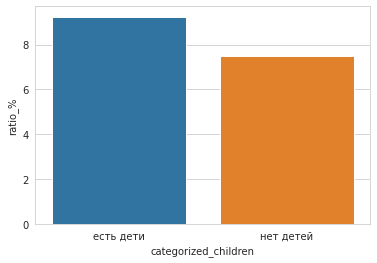

In [426]:
sns.barplot(x=data_pivot_children.index,
            y='ratio_%',
            data=data_pivot_children)

*зависимость между семейным положением и возвратом кредита в срок*

<AxesSubplot:xlabel='ratio_%', ylabel='family_status'>

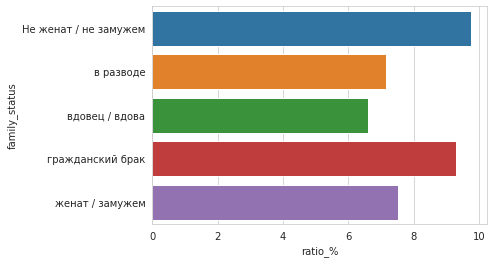

In [427]:
sns.barplot(x='ratio_%',
            y=data_pivot_family.index,
            data=data_pivot_family)

*зависимость между уровнем дохода и возвратом кредита в срок*

<AxesSubplot:xlabel='categorized_income', ylabel='ratio_%'>

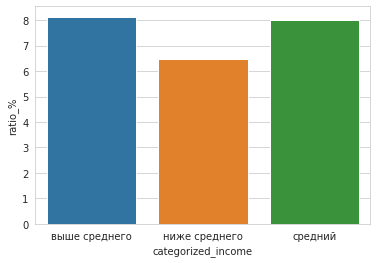

In [428]:
sns.barplot(x=data_pivot_income.index,
            y='ratio_%',
            data=data_pivot_income)

*зависимость между целями кредита и возвратом кредита в срок*

<AxesSubplot:xlabel='ratio_%', ylabel='categorized_purpose'>

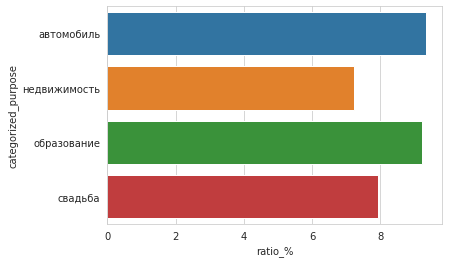

In [429]:
sns.barplot(x='ratio_%',
            y=data_pivot_purpose.index,
            data=data_pivot_purpose)

<div class="alert alert-block alert-warning">
    
<b>Remarks:</b>  Также давай напишем информативный общий вывод. Подумай об этом так: большинство заказчиков мало понимают в датасаенсе и начнут читать работу именно с него. Вывод должен содержать все обнаруженные инсайды и главное цифры.</div>

<div class="alert alert-block alert-info">
Я расписала вывод подробнее, добавила цифры и графики.✔
</div>

<div class="alert alert-block alert-success">
Красота!

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл;
- [x]  файл изучен;
- [x]  определены пропущенные значения;
- [x]  заполнены пропущенные значения;
- [x]  есть пояснение, какие пропущенные значения обнаружены;
- [x]  описаны возможные причины появления пропусков в данных;
- [x]  объяснено, по какому принципу заполнены пропуски;
- [x]  заменен вещественный тип данных на целочисленный;
- [x]  есть пояснение, какой метод используется для изменения типа данных и почему;
- [x]  удалены дубликаты;
- [x]  есть пояснение, какой метод используется для поиска и удаления дубликатов;
- [x]  описаны возможные причины появления дубликатов в данных;
- [x]  выделены леммы в значениях столбца с целями получения кредита;
- [x]  описан процесс лемматизации;
- [x]  данные категоризированы;
- [x]  есть объяснение принципа категоризации данных;
- [x]  есть ответ на вопрос: "Есть ли зависимость между наличием детей и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Есть ли зависимость между семейным положением и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Есть ли зависимость между уровнем дохода и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Как разные цели кредита влияют на его возврат в срок?";
- [x]  в каждом этапе есть выводы;
- [x]  есть общий вывод.

In [430]:
#!c1.4
